In [1]:
import requests
import pandas as pd
import numpy


def get_historic_price(symbol, exchange='bitfinex', after='2019-01-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    # print(url)
    response = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    response.raise_for_status()
    data = response.json()
    # print(data)
    df = pd.DataFrame(data['result']['3600'],columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
# print(last_week)
btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_week)



In [2]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,9344.170690,9385.702356,9311.563678,9350.933333,356.504150,3.387431e+06
std,304.905689,312.084475,302.014418,307.998760,567.013362,5.688815e+06
min,8716.050000,8806.310000,8690.000000,8726.100000,34.181783,3.259450e+05
25%,9152.965000,9185.660000,9120.185000,9156.877500,125.095490,1.174703e+06
50%,9446.705000,9486.425000,9414.050000,9447.850000,234.047191,2.206660e+06
75%,9541.852500,9566.032500,9513.345000,9540.400000,392.332040,3.641181e+06
max,10203.640000,10429.260000,10108.920000,10203.640000,6422.070709,6.498584e+07


In [3]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-26 00:00:00,8905.77,8938.42,8885.68,8903.56,137.954073,1.230818e+06
2020-05-26 01:00:00,8903.22,8923.83,8825.06,8858.63,336.314351,2.980237e+06
2020-05-26 02:00:00,8863.02,8890.15,8854.25,8886.40,106.102916,9.412677e+05
2020-05-26 03:00:00,8886.40,8917.99,8873.96,8881.28,68.615906,6.105639e+05
2020-05-26 04:00:00,8875.82,8931.94,8868.59,8901.57,136.896960,1.218921e+06


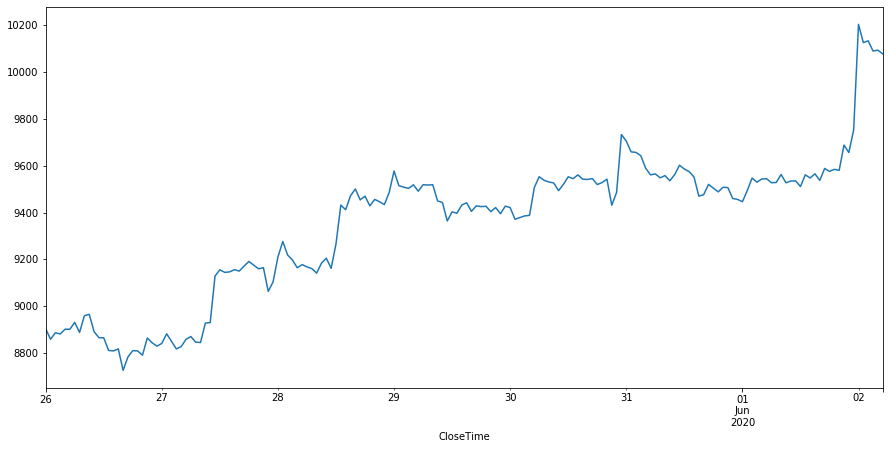

In [4]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [5]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-26 00:00:00,203.76,204.82,203.76,204.04,1059.799815,216591.468298
2020-05-26 01:00:00,204.00,204.73,202.63,203.08,2530.300820,514757.547153
2020-05-26 02:00:00,203.38,204.28,203.38,204.18,902.933685,184057.653983
2020-05-26 03:00:00,204.44,204.63,203.98,204.04,914.178499,186832.181916
2020-05-26 04:00:00,203.94,204.99,203.81,204.49,552.729302,112870.849291


In [6]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p1 = figure(x_axis_type='datetime', title='Crypto Prices', width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label='Date'
p1.yaxis.axis_label='Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bicoin')
p1.legend.location = 'top_left'

show(p1)

Loading BokehJS ...

In [7]:
writer = pd.ExcelWriter('C:/Users/dipta/OneDrive/Documents/Work/Python-Data Science/CryptoData.xlsx')
btc.to_excel(writer, 'Bitcoin')
writer.save()